In [ ]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/EDA.jpg',width=600,height=600)

In [ ]:
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.png',width=900,height=300)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/iris.data'

df = pd.read_csv(dataset_path, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.describe().T

In [ ]:
df.groupby('class').count()

In [ ]:
df.info()

In [ ]:
## only notebook local
#!pip install jupyter-summarytools -q

from summarytools import dfSummary
dfSummary(df)

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [ ]:
sns.pairplot(df);

In [ ]:
sns.pairplot(df, hue='class', height=3, aspect=1);

In [ ]:
df.hist(figsize=(12,8));

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(12,10));

In [ ]:
df.boxplot(figsize=(20,15));

In [ ]:
df.boxplot(by='class', figsize=(20,15));

In [ ]:
plt.figure(figsize=(20,10));

# subplot su matrice 2x2

plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='sepal width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='petal length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df);

In [ ]:
plt.figure(figsize=(16, 6))
plt.title('inserire il titolo')
plt.legend('class')
sns.countplot(x='sepal width',data=df,hue='class');

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('inserire il titolo')
sns.countplot(x='class', hue="class", data=df);

In [ ]:
sns.jointplot(x="sepal length", y="sepal width", data=df, size=8);

In [ ]:
sns.jointplot(x="petal length", y="petal width", data=df, size=8, color='red');

In [ ]:
sns.lmplot(x="petal length", y="petal width",hue='class', data=df, fit_reg=False);

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(x="class", y="petal length", data=df);

In [ ]:
plt.figure(figsize=(8,10));

sns.boxplot(x="class", y="petal length", data=df);
sns.stripplot(x="class", y="petal length", data=df);

In [ ]:
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length", data=df);

In [ ]:
#palette
plt.figure(figsize=(13,10));

sns.violinplot(x="class", y="petal length",  palette={"blue","red","yellow"}, data=df);

In [ ]:
sns.FacetGrid(df, hue="class") \
   .map(sns.kdeplot, "petal length") \
   .add_legend()

In [ ]:
sns.jointplot(x="sepal length", y="sepal width", data=df, size=10,ratio=10, kind='hex',color='green')

In [ ]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(13,10));
andrews_curves(df, "class",colormap='rainbow');

In [ ]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(8,6));
parallel_coordinates(df, "class",colormap='cool');

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

In [38]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
X = df.drop(columns='class')
y = df['class']

In [ ]:
X.to_csv("Iris_dataset.csv", index=False)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667
                                                    )

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ifoa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [53]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

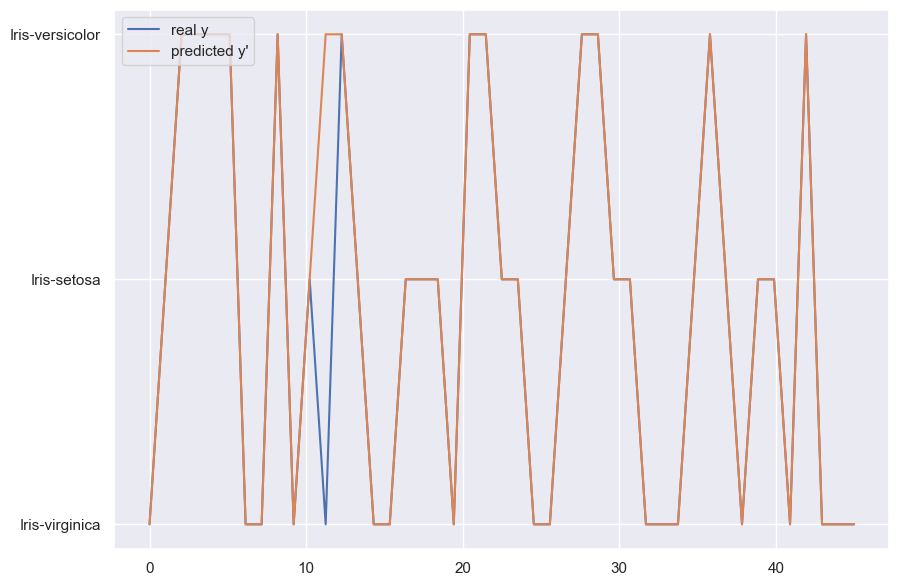

In [57]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(10,7))
plt.plot(x, y_test, label='real y')
plt.plot(x, y_pred, label="predicted y'")
plt.legend(loc=2)

In [58]:
joblib.dump(model, "Classification_iris.pkl")

['Classification_iris.pkl']

In [63]:
acc = accuracy_score(y_test, y_pred)
print(f"l'accuracy totale è: {round(acc,3)*100}%")

l'accuracy totale è: 97.8%
